# Preproccessing Notebook
- Purpose of this notebook is to produce a baseline data file: 'housing.csv'
- Please **do not edit** this notebook.  Use the 'housing.csv' as a starting point for further experimentation and write new scripts/notebooks accordingly
- Authors: Jessica Joy, David Kim, Eugene Ng

In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
import warnings
warnings.filterwarnings('ignore')


housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
housing.set_index('PID', inplace=True)
housing.shape

(2580, 80)

### Select columns

In [218]:
housing = housing[['SalePrice','MSSubClass','MSZoning','LotArea','Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl','GrLivArea','Exterior1st','MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',\
                   'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',\
                   'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',\
                   'Heating', 'HeatingQC', 'CentralAir','MoSold', 'YrSold','SaleCondition',\
                   'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',\
                   'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',\
                   'Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish',\
                   'GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive',\
                   'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','Fence']]
housing

,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,GrLivArea,Exterior1st,MasVnrType,MasVnrArea,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909176150,126000,30,RL,7890,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,856,Wd Sdng,None,0.0,...,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN
905476230,139500,120,RL,4235,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,1049,HdBoard,BrkFace,149.0,...,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN
911128020,124900,30,C (all),6060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,1001,MetalSd,None,0.0,...,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN
535377150,114000,70,RL,8146,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,1039,MetalSd,None,0.0,...,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN
534177230,227000,60,RL,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,1665,VinylSd,None,0.0,...,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903205040,121000,30,RL,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,952,Wd Sdng,None,0.0,...,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NaN
905402060,139600,20,RL,13680,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,1733,BrkFace,None,0.0,...,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NaN
909275030,145000,90,RH,6270,Pave,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,2002,MetalSd,None,0.0,...,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,2Types,Unf,3.0,871.0,TA,TA,Y,0,0,0,0,0,0,NaN


### Convert Ordinals

In [219]:
#convert ordinal categorical variables

# Basement Condition
housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
housing.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
housing.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
housing.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Basement Quality
housing.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Quality
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Heating Quality and Condition
housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

#Fence quality
housing.Fence.replace({'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}, inplace=True)

#Kitchen, garage and pavedDrive quality
housing.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

#(LotShape, LotContour, Utilities, LandSlope)
housing.LotShape.replace({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}, inplace=True)
housing.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)
housing.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)
housing.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

##### Convert MSSubClass column to categorical

In [220]:
housing['MSSubClass'] = housing['MSSubClass'].astype(str)

### Data Cleanup: fillna

In [221]:
#NAs to 0
housing[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','MasVnrType','MasVnrArea','Fence']] = \
housing[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','MasVnrType','MasVnrArea','Fence']].fillna(0)
housing[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterQual','ExterCond','HeatingQC']] = \
housing[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterQual','ExterCond','HeatingQC']].fillna(0)

# Filling nominal NA's with 0's (no basement or garage)
housing['GarageQual'].fillna(0, inplace = True)
housing['GarageCond'].fillna(0, inplace = True)
housing['GarageCars'].fillna(0, inplace = True)
housing['GarageArea'].fillna(0, inplace = True)

# Filling categorical NA's with 'None' (no garage)
housing['GarageType'].fillna('None', inplace = True)
housing['GarageFinish'].fillna('None', inplace = True)

### Data Cleanup: Combine Bathrooms to create 'TotalBath' feature

In [222]:
# Filling Basement bathroom NA's with 0
housing['BsmtFullBath'].fillna(0, inplace = True)
housing['BsmtHalfBath'].fillna(0, inplace = True)

# Combining bathrooms to single variable and dropping the individual counts
housing['TotalBath'] = housing['BsmtFullBath'] + (housing['BsmtHalfBath']*5) + housing['FullBath'] + (housing['HalfBath']*.5)
housing.drop(['BsmtFullBath', 'BsmtHalfBath', 'HalfBath'], axis = 1, inplace = True)

### Convert Binary categorical

In [223]:
#convert CentralAir - binary categorical
housing['CentralAir'] = housing.CentralAir.map(lambda t:0 if t=='N' else 1)

#make binary - add hip to style?
housing['RoofStyle']= [1 if x =='Gable' else 0 for x in housing['RoofStyle']]
housing['RoofMatl']= [1 if x =='CompShg' else 0 for x in housing['RoofMatl']]

housing.rename(columns = {'RoofStyle': 'RoofStyle_Gable', 'RoofMatl': 'RoofMatl_CompShg'}, inplace = True)

#create street binary
housing['Street']= [1 if x =='Pave' else 0 for x in housing['Street']]
housing.rename(columns = {'Street': 'Street_Paved'}, inplace = True)

### Dummification

In [224]:
dummies=['Exterior1st','MasVnrType','Foundation','Heating',\
         'Functional','GarageType','GarageFinish',\
        'MSSubClass','MSZoning','BldgType','LotConfig','HouseStyle',\
         'Condition1']

for d in dummies:
    temp = pd.get_dummies(housing[d], prefix=d, prefix_sep='__')
    temp = temp.drop(d+'__'+str(housing[d].mode()[0]), axis=1)
    #drop the most common one (mode), making it the base case
    housing = pd.concat([housing.drop(d, axis=1),temp], axis=1)
    #merge back with main df

### Drop these columns
- Dropping GarageArea/GarageCond because they are less correlated than their counterpats GarageCars/GarageQual

In [225]:
housing.drop(['GarageArea', 'GarageCond'], axis = 1, inplace = True)
housing.drop(['FireplaceQu'], axis = 1, inplace = True)
housing.drop(['Condition2'], axis = 1, inplace = True)

### Remove Outliers

In [226]:
housing.drop(housing[housing["GrLivArea"] > 4000].index, inplace = True)

### Log Transformations

In [227]:
housing['LotArea']=np.log(housing['LotArea'])
housing['GrLivArea'] = np.log(housing['GrLivArea'])
housing.rename(columns = {'LotArea': 'LotArea_Log', 'GrLivArea':'GrLivArea_Log', 'SalePrice':'SalePrice_Log'}, inplace = True)

### Feature engineer: Add distance to ISU

In [200]:
#ISU_dist = pd.read_csv('./data/ISU_dist.csv', index_col=0)
#housing = housing.merge(ISU_dist, how='left', left_index=True, right_index=True)
#housing['ISU_dist'].fillna(np.mean(housing.ISU_dist),inplace=True)

### file sanity check

In [201]:
missing = housing.isnull().sum()
missing = missing[missing > 0]
missing

Series([], dtype: int64)

### Feature engineering on Neighborhoods:

In [228]:
#filter sale condition == Normal
housing.drop(housing[housing["SaleCondition"] != 'Normal'].index, inplace = True)

In [229]:
housing

,SalePrice_Log,LotArea_Log,Street_Paved,LotShape,LandContour,Utilities,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle_Gable,RoofMatl_CompShg,GrLivArea_Log,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,...,MSZoning__RH,MSZoning__RM,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,HouseStyle__1.5Fin,HouseStyle__1.5Unf,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,Condition1__Artery,Condition1__Feedr,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909176150,126000,8.973351,1,4,4,4,3,SWISU,6,6,1939,1950,1,1,6.752270,0.0,3,3,3.0,3.0,1.0,3.0,238.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
905476230,139500,8.351139,1,4,4,4,3,Edwards,5,5,1984,1984,1,1,6.955593,149.0,4,3,4.0,3.0,2.0,6.0,552.0,5.0,393.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
911128020,124900,8.709465,1,4,4,4,3,IDOTRR,5,9,1930,2007,0,1,6.908755,0.0,4,3,3.0,3.0,1.0,5.0,737.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
535377150,114000,9.005282,1,4,4,4,3,OldTown,4,8,1900,2003,1,1,6.946014,0.0,4,4,2.0,3.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
534177230,227000,9.035987,1,4,4,4,3,NWAmes,8,6,2001,2001,1,1,7.417580,0.0,4,3,4.0,3.0,1.0,6.0,643.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903205040,121000,9.088625,1,4,4,4,3,BrkSide,6,6,1916,1950,1,1,6.858565,0.0,3,3,3.0,3.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
905402060,139600,9.523690,1,3,4,4,3,Edwards,3,5,1955,1955,0,1,7.457609,0.0,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
909275030,145000,8.743532,1,4,2,4,3,Crawfor,5,6,1949,1950,1,1,7.601902,0.0,3,3,3.0,3.0,1.0,4.0,284.0,1.0,0.0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


##### Box plot of mean price of neighborhoods sorted by mean price

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice_Log'>

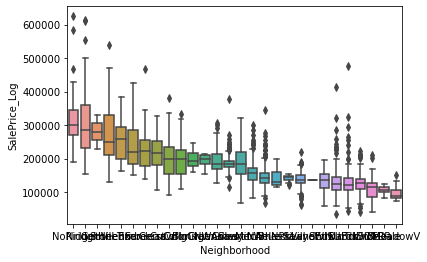

In [230]:
import seaborn as sns
my_order = housing.groupby(by=["Neighborhood"])['SalePrice_Log'].mean().sort_values(ascending=False).index
sns.boxplot(y=housing['SalePrice_Log'], x=housing['Neighborhood'], order=my_order)

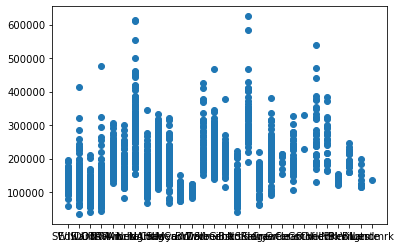

In [231]:
plt.scatter(y=housing['SalePrice_Log'], x=housing['Neighborhood'])

In [232]:
housing.groupby(by=["Neighborhood"])['SalePrice_Log'].mean().describe()

count        28.000000
mean     184764.972453
std       61583.866467
min       96836.470588
25%      135879.687500
50%      188179.764296
75%      218394.177632
max      319616.030303
Name: SalePrice_Log, dtype: float64

In [233]:
#create new column with mean of each neighborhood
housing['neighbor_mean'] = housing.groupby("Neighborhood").SalePrice_Log.transform('mean')

In [234]:
#not sure why there is a difference from above? similar enough...
housing['neighbor_mean'].describe()

count      2413.000000
mean     175335.152507
std       52225.756914
min       96836.470588
25%      132518.750000
50%      163818.316832
75%      196501.871681
max      319616.030303
Name: neighbor_mean, dtype: float64

In [244]:
#create new column where an ordinal number is filled in for each range of mean sale price based on .describe() above
neighbor = [] 
for neighborhood in housing['neighbor_mean']: 
    if neighborhood < 132518.75: 
        neighbor.append(1) 
    elif neighborhood >= 132518.75 and neighborhood < 163818.316832: 
        neighbor.append(2) 
    elif neighborhood >= 163818.316832 and neighborhood < 196501.871681: 
        neighbor.append(3)
    else: 
        neighbor.append(4) 

housing['Neighborhood_Mean'] = neighbor

In [245]:
housing['Neighborhood_Mean'].value_counts()

4    744
2    704
1    585
3    380
Name: Neighborhood_Mean, dtype: int64

<AxesSubplot:xlabel='Neighborhood_Mean', ylabel='SalePrice_Log'>

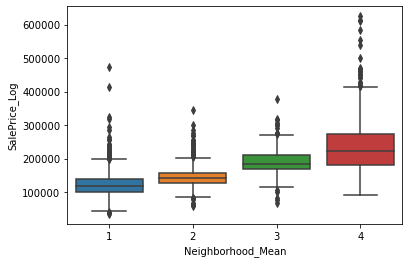

In [246]:
sns.boxplot(y=housing['SalePrice_Log'], x=housing['Neighborhood_Mean'])

In [248]:
#drop other neighborhood columns and just keep ordinal
housing.drop(['Neighborhood', 'neighbor_mean','SaleCondition'], axis = 1, inplace = True)

In [249]:
#put sale price back to log form
housing['SalePrice_Log']=np.log(housing['SalePrice_Log'])

In [250]:
#dummify this ordinal column
dummies=['Neighborhood_Mean']

for d in dummies:
    temp = pd.get_dummies(housing[d], prefix=d, prefix_sep='__')
    temp = temp.drop(d+'__'+str(housing[d].mode()[0]), axis=1)
    #drop the most common one (mode), making it the base case
    housing = pd.concat([housing.drop(d, axis=1),temp], axis=1)
    #merge back with main df

In [251]:
from sklearn.feature_selection import f_regression
Y = housing['SalePrice_Log']
F_values, p_values = f_regression(housing, Y)
pd.Series(p_values, index=housing.columns).head(20)

SalePrice_Log        1.000000e+00
LotArea_Log          2.291664e-86
Street_Paved         1.381469e-04
LotShape             1.938924e-56
LandContour          1.207314e-05
Utilities            7.554296e-03
LandSlope            2.266383e-04
OverallQual          0.000000e+00
OverallCond          1.012980e-02
YearBuilt           7.999435e-224
YearRemodAdd        6.034180e-191
RoofStyle_Gable      6.675707e-17
RoofMatl_CompShg     6.815297e-05
GrLivArea_Log        0.000000e+00
MasVnrArea          1.054327e-106
ExterQual           8.878100e-294
ExterCond            2.885176e-02
BsmtQual            1.269272e-242
BsmtCond             4.197031e-42
BsmtExposure         6.532811e-85
dtype: float64

In [252]:
housing.to_csv('housing_neigh.csv')